In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn import linear_model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import math
from scipy.stats import norm
import zipfile
import io
from urllib.request import urlopen
from datetime import datetime
import abc
from abc import ABC
from enum import Enum

## 6.4 Data Structures in Python

### 6.4.1 Tuples

In [ ]:
tuple1 = ('SPY', '2018-09-06', 290.31)
print(tuple1)

('SPY', '2018-09-06', 290.31)


In [ ]:
tuple1 = ('SPY', '2018-09-06', 290.31)
tuple1[0] = 'QQQ'
print(tuple1)    # error expected

TypeError: 'tuple' object does not support item assignment

In [ ]:
tuple1 = ('SPY', 290.31)
tuple2 = ('QQQ', 181.24)
tuples = (tuple1, tuple2)
print(tuples)

(('SPY', 290.31), ('QQQ', 181.24))


### 6.4.2 Lists

In [ ]:
list1 = ["SPY", 1, 2]
list2 = [0, "QQQ"]
lists = [list1, list2]
print(lists[0][1])

1


In [ ]:
list1 = ["SPY", 1, 2]
list1[0] = "IWM"
list2 = [0, "QQQ"]
lists = [list1, list2]
print(lists)

[['IWM', 1, 2], [0, 'QQQ']]


### 6.4.3 Array

In [ ]:
a = np.array([1,2,3])
a[1] = 3
b = np.array([4,5,6])
c = a + b
print(f'a:{a}\nb:{b}\nc:{c}')

a:[1 3 3]
b:[4 5 6]
c:[5 8 9]


In [ ]:
a = np.array([1,2,3])
b = np.array([4,5,6])
c = a * b
print(c)

[ 4 10 18]


In [ ]:
a = np.array([1,2,3])
b = np.array([4,5,6])
c = a.dot(b)
d = np.dot(a, b)
print(f'c:{c}\nd:{d}')

c:32
d:32


### 6.4.5 Covariance Matrices in Practice

In this coding example, we show how to compute the covariance and correlation matrices of stock returns:

In [ ]:
ret_aapl = np.random.random(size=200)
ret_spy = np.random.random(size=200)

# calculate the covariance matrix using np.cov()
print(np.cov(ret_aapl, ret_spy))

# calculate the correlation matrix using np.corrcoef()
print(np.corrcoef(ret_aapl, ret_spy))

[[8.88750457e-02 9.90366884e-05]
 [9.90366884e-05 8.48103703e-02]]
[[1.         0.00114073]
 [0.00114073 1.        ]]


Note that covariance and correlation matrices are symmetric, and positive semi-definite. Further, we know that the diagonals in a covariance matrix consist of the variances of each variable, while the other entries represent the covariance between each pair of variables. Symmetry of a covariance matrix follows directly from the properties of covariance, that is: $COV(A,B) = COV(B,A)$.

Likewise, the diagonals of the correlation matrix consist of $1$'s, which represents the correlation of each variable with itself. All the other entries are the correlation between each variable pair. It's easy to show that $CORR(A,B) = CORR(B,A)$ resulting in a symmetric matrix.

In practice, the magnitude of variance and covariance terms depends on the magnitude of the underlying data. Series with large values are likely to lead to larger variances and covariances, all else equal, and vice versa.  On the other hand, the correlation coefficient is normalized and is always between $-1$ and $1$. Therefore, it is more appropriate to compare correlations over a cross-section of variables than covariances. In these cases, it is best practice to base our analysis on a correlation matrix.

### 6.4.6 Covariance Matrices in Practice: Are Correlations Stationary?

In [ ]:
# load data
df_data = yf.download(['SPY','AAPL'], start='2020-01-01', end='2021-03-01', auto_adjust=False)['Adj Close']
df_ret = np.log(df_data/df_data.shift(1)).dropna()
df_ret.tail()

[*********************100%***********************]  2 of 2 completed


Ticker,AAPL,SPY
Date,,
2021-02-22,-0.030252,-0.007722
2021-02-23,-0.001112,0.001214
2021-02-24,-0.004060,0.010959
2021-02-25,-0.035402,-0.024391
2021-02-26,0.002229,-0.005166


In [ ]:
# calculate rolling correlation
n_days = 21
df_roll_corr = df_ret['AAPL'].rolling(n_days).corr(df_ret['SPY']).to_frame().rename({0:'roll_corr'},axis=1).dropna()
df_roll_corr.tail()

,roll_corr
Date,
2021-02-22,0.486358
2021-02-23,0.530386
2021-02-24,0.543933
2021-02-25,0.634680
2021-02-26,0.700719


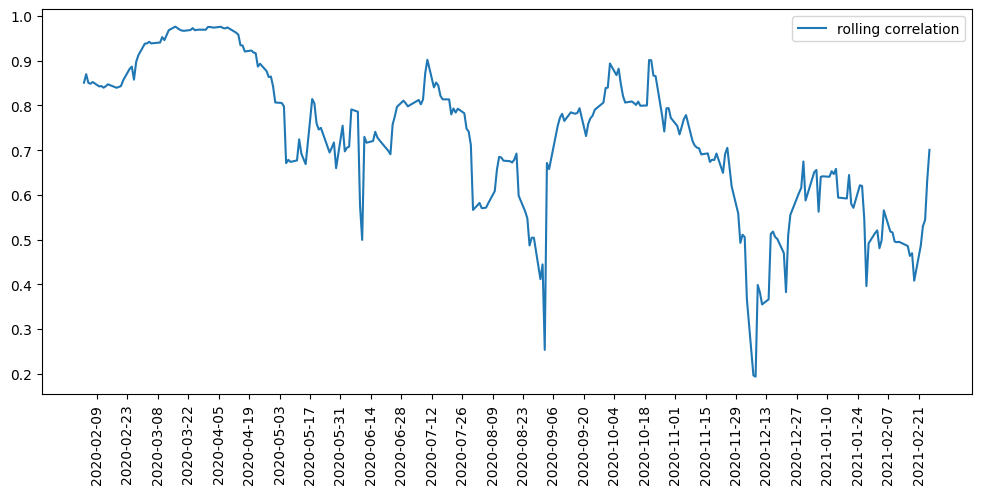

In [ ]:
# visualization
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(df_roll_corr, label='rolling correlation')
ticks_range = pd.date_range(df_roll_corr.index.min(), df_roll_corr.index.max(), freq='2W', inclusive='both')
plt.xticks(ticks_range, rotation=90)
plt.legend()
plt.show()

### 6.4.7 Series

In [ ]:
s = pd.Series(data=np.random.random(size=5),
              index=['2014','2015','2016','2017','2018'])
print(s)

2014    0.823050
2015    0.885058
2016    0.995171
2017    0.943867
2018    0.411695
dtype: float64


### 6.4.8 Dataframe

In [ ]:
# create a dataframe
df = pd.DataFrame(data=np.random.random(size=(5,3)),
                  index=['2014','2015','2016','2017','2018'],
                  columns=['SPY', 'QQQQ', 'IWM'])
df

,SPY,QQQQ,IWM
2014,0.582537,0.285530,0.005026
2015,0.912225,0.491813,0.594775
2016,0.380229,0.988855,0.115356
2017,0.350769,0.108974,0.424260
2018,0.090559,0.710757,0.173472


In [ ]:
# accessing rows or columns
# use df_ret in 6.4.6

df = df_ret.copy()
print(df.loc['2021-02-22'])     # row access
print('\n')
print(df.loc[['2021-02-22']])   # subtable
print('\n')
print(df.loc[:,['AAPL']])       # subtable
print('\n')

print(df.iloc[0])               # row access
print('\n')
print(df.iloc[[0]])             # subtable
print('\n')
print(df.iloc[:,[0]])           # subtable

Ticker
AAPL   -0.030252
SPY    -0.007722
Name: 2021-02-22 00:00:00, dtype: float64


Ticker          AAPL       SPY
Date                          
2021-02-22 -0.030252 -0.007722


Ticker          AAPL
Date                
2020-01-03 -0.009770
2020-01-06  0.007937
2020-01-07 -0.004714
2020-01-08  0.015958
2020-01-09  0.021019
...              ...
2021-02-22 -0.030252
2021-02-23 -0.001112
2021-02-24 -0.004060
2021-02-25 -0.035402
2021-02-26  0.002229

[290 rows x 1 columns]


Ticker
AAPL   -0.009770
SPY    -0.007601
Name: 2020-01-03 00:00:00, dtype: float64


Ticker         AAPL       SPY
Date                         
2020-01-03 -0.00977 -0.007601


Ticker          AAPL
Date                
2020-01-03 -0.009770
2020-01-06  0.007937
2020-01-07 -0.004714
2020-01-08  0.015958
2020-01-09  0.021019
...              ...
2021-02-22 -0.030252
2021-02-23 -0.001112
2021-02-24 -0.004060
2021-02-25 -0.035402
2021-02-26  0.002229

[290 rows x 1 columns]


In [ ]:
# merge
dfSPY = pd.DataFrame(data=np.random.random(size=(5,1)),
                     index=['2014','2015','2016','2017','2018'], columns=['SPY'])
dfQQQ = pd.DataFrame(data=np.random.random(size=(5,1)),
                     index=['2014','2015','2016','2017','2018'], columns=['QQQ'])
dfSPY.join(dfQQQ)

,SPY,QQQ
2014,0.223748,0.687451
2015,0.895112,0.309837
2016,0.194442,0.623989
2017,0.696500,0.777251
2018,0.716654,0.254610


In [ ]:
# concatenate or append
dfSPYOld = pd.DataFrame(data=np.random.random(size=(5,1)),
                        index=['2009','2010','2011','2012','2013'], columns=['SPY'])
dfSPYNew = pd.DataFrame(data=np.random.random(size=(5,1)),
                        index=['2014','2015','2016','2017','2018'], columns=['SPY'])

dfSPY = pd.concat([dfSPYOld, dfSPYNew])
dfSPY

,SPY
2009,0.194224
2010,0.262674
2011,0.105543
2012,0.505490
2013,0.923489
2014,0.053841
2015,0.749455
2016,0.095380
2017,0.734952
2018,0.491830


In [ ]:
# head and tail
dfSPY = pd.DataFrame(data=np.random.random(size=(5,1)),
                     index=['2014','2015','2016','2017','2018'], columns=['SPY'])

dfSPY.head(3)

,SPY
2014,0.532489
2015,0.536824
2016,0.721612


In [ ]:
dfSPY.tail(2)

,SPY
2017,0.827466
2018,0.949208


In [ ]:
# pivot
df = pd.DataFrame(data={'date': ['2021-2-20']*3 + ['2021-2-21']*3,
	'stock': ['SPY','AAPL','GOOG']*2,
	'forecast1': ['T','F','F','T','T','T'],
	'forecast2': ['F','F','T','T','F','T'],
	'forecast3': ['T','T','F','F','T','F']})
df

,date,stock,forecast1,forecast2,forecast3
0,2021-2-20,SPY,T,F,T
1,2021-2-20,AAPL,F,F,T
2,2021-2-20,GOOG,F,T,F
3,2021-2-21,SPY,T,T,F
4,2021-2-21,AAPL,T,F,T
5,2021-2-21,GOOG,T,T,F


In [ ]:
# make a pivot table
df.pivot(index='date', columns='stock', values='forecast1')

stock,AAPL,GOOG,SPY
date,,,
2021-2-20,F,F,T
2021-2-21,T,T,T


In [ ]:
# make a pivot table with hierarchical columns (multiple values)
df.pivot(index='date', columns='stock', values=['forecast2','forecast3'])

forecast2          forecast3         
stock          AAPL GOOG SPY      AAPL GOOG SPY
date                                           
2021-2-20         F    T   F         T    F   T
2021-2-21         F    T   T         T    F   F

In [ ]:
# unpivot/melt
df = pd.DataFrame(data={'date': ['2021-2-20','2020-2-21', '2020-2-22'],
	'SPY': ['T','F','F'],
	'AAPL': ['F','F','T'],
	'GOOG': ['T','T','F']})
df

,date,SPY,AAPL,GOOG
0,2021-2-20,T,F,T
1,2020-2-21,F,F,T
2,2020-2-22,F,T,F


In [ ]:
df.melt(id_vars=['date'], value_vars=['SPY','AAPL','GOOG'], value_name='forecast')

,date,variable,forecast
0,2021-2-20,SPY,T
1,2020-2-21,SPY,F
2,2020-2-22,SPY,F
3,2021-2-20,AAPL,F
4,2020-2-21,AAPL,F
5,2020-2-22,AAPL,T
6,2021-2-20,GOOG,T
7,2020-2-21,GOOG,T
8,2020-2-22,GOOG,F


In [ ]:
# basic stats
df = pd.DataFrame(data=np.random.random(size=(5,3)),
                  index=['2009','2010','2011','2012','2013'],
                  columns=['SPY','AAPL','GOOG'])
df

,SPY,AAPL,GOOG
2009,0.632539,0.547472,0.516920
2010,0.052956,0.152422,0.676121
2011,0.662616,0.807093,0.248508
2012,0.117926,0.353610,0.108126
2013,0.305988,0.412455,0.146723


In [ ]:
print('=====count=====\n',df.count())
print('=====mean=====\n',df.mean())
print('=====median=====\n',df.median())
print('=====std=====\n',df.std())
print('=====quantile=====\n',df.quantile(q=0.75))
print('=====min=====\n',df.min())
print('=====shift=====\n',df.shift(periods=2, fill_value=0))
print('=====rolling mean=====\n',df.rolling(3).mean())

=====count=====
 SPY     5
AAPL    5
GOOG    5
dtype: int64
=====mean=====
 SPY     0.354405
AAPL    0.454610
GOOG    0.339280
dtype: float64
=====median=====
 SPY     0.305988
AAPL    0.412455
GOOG    0.248508
dtype: float64
=====std=====
 SPY     0.283501
AAPL    0.242983
GOOG    0.246864
dtype: float64
=====quantile=====
 SPY     0.632539
AAPL    0.547472
GOOG    0.516920
Name: 0.75, dtype: float64
=====min=====
 SPY     0.052956
AAPL    0.152422
GOOG    0.108126
dtype: float64
=====shift=====
            SPY      AAPL      GOOG
2009  0.000000  0.000000  0.000000
2010  0.000000  0.000000  0.000000
2011  0.632539  0.547472  0.516920
2012  0.052956  0.152422  0.676121
2013  0.662616  0.807093  0.248508
=====rolling mean=====
            SPY      AAPL      GOOG
2009       NaN       NaN       NaN
2010       NaN       NaN       NaN
2011  0.449371  0.502329  0.480516
2012  0.277833  0.437708  0.344252
2013  0.362177  0.524386  0.167786


In [ ]:
# user-defined function
# use df_data in 6.4.6
# this self-defined function converts simple returns to log returns
df_ret_simple = df_data.pct_change().dropna()
df_ret_simple.apply(lambda x: np.log(x+1))

Ticker,AAPL,SPY
Date,,
2020-01-03,-0.009770,-0.007601
2020-01-06,0.007937,0.003807
2020-01-07,-0.004714,-0.002816
2020-01-08,0.015958,0.005315
2020-01-09,0.021019,0.006758
...,...,...
2021-02-22,-0.030252,-0.007722
2021-02-23,-0.001112,0.001214
2021-02-24,-0.004060,0.010959


### 6.4.9 Dictionary

In [ ]:
dict = {}
dict

{}

In [ ]:
dict = {0: "SPY", 1: "QQQ", 2: "IWM"}
dict

{0: 'SPY', 1: 'QQQ', 2: 'IWM'}

## 6.5 Implementation of Quant Techniques in Python

### 6.5.1 Random Number Generation

In [ ]:
# uniform
rnds = np.random.rand(100, 100)
rnds

array([[0.2671194 , 0.7911189 , 0.4356963 , ..., 0.55807644, 0.64193513,
        0.42707515],
       [0.06672413, 0.28044988, 0.37885929, ..., 0.11963135, 0.34044416,
        0.97574091],
       [0.159141  , 0.61088486, 0.39414324, ..., 0.76966961, 0.19056541,
        0.31181825],
       ...,
       [0.92299683, 0.07936456, 0.59775755, ..., 0.04498247, 0.93354162,
        0.2976673 ],
       [0.49810393, 0.77668124, 0.15458578, ..., 0.44877142, 0.52470313,
        0.98289735],
       [0.07948229, 0.30334721, 0.23136593, ..., 0.20876708, 0.83178561,
        0.91358408]])

In [ ]:
# normal
mat_shape = (100, 100)
norm_rnds = np.random.normal(0.0, 1.0, mat_shape)
norm_rnds

array([[-0.95206658, -0.8739756 ,  0.4088049 , ..., -0.48214675,
        -0.54907221,  0.10980622],
       [ 0.37590138,  0.36702719, -0.95281586, ..., -0.71712453,
         0.79072108, -0.75562821],
       [ 0.93633477, -1.87574397,  0.3456375 , ...,  0.16475806,
         3.00714977,  0.4386775 ],
       ...,
       [ 0.19904944, -1.558405  , -0.28643663, ...,  1.85303138,
        -0.69722851,  0.6037847 ],
       [-0.89773109,  0.2881998 , -1.33219794, ...,  1.5771859 ,
        -0.84657178, -0.48761021],
       [-0.9123638 ,  0.49565109,  1.83760976, ...,  0.54812086,
        -0.60067973,  0.29849729]])

### 6.5.2 Linear Regression

In [ ]:
Xs = np.random.rand(100, 2)
Ys = np.random.rand(100, 1)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(Xs, Ys)
print(regr.coef_)

[[ 0.19362654 -0.00675653]]


#### 6.5.3 Linear Regression in Practice: Equity Return Decomposition by Fama-French Factors

In [ ]:
# load equity data
df_data = yf.download(['AAPL'], start='2000-01-01', end='2024-12-31', auto_adjust=False)['Adj Close']
df_ret = np.log(df_data/df_data.shift(1)).dropna()
df_ret.tail()

[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2024-12-23,0.003060
2024-12-24,0.011413
2024-12-26,0.003171
2024-12-27,-0.013331
2024-12-30,-0.013352


In [ ]:
# load fama-french factors
url = 'https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_daily_CSV.zip'
url = urlopen(url)

z = zipfile.ZipFile(io.BytesIO(url.read()))
csv_file = z.namelist()[0]
df_fama_french = pd.read_csv(z.open(csv_file), header=0, names=['Date','MKT-RF','SMB','HML','RF'], skiprows=3).dropna()
df_fama_french['Date'] = df_fama_french['Date'].apply(lambda x: pd.Timestamp(datetime.strptime(x, '%Y%m%d').date(), tz='UTC'))
df_fama_french.set_index('Date', inplace=True)
df_fama_french = df_fama_french[df_ret.index.min().tz_localize('UTC'):df_ret.index.max().tz_localize('UTC')]

df_fama_french.head()

,MKT-RF,SMB,HML,RF
Date,,,,
2000-01-04 00:00:00+00:00,-4.06,-0.02,2.07,0.02
2000-01-05 00:00:00+00:00,-0.09,0.31,-0.05,0.02
2000-01-06 00:00:00+00:00,-0.74,-0.43,1.24,0.02
2000-01-07 00:00:00+00:00,3.21,-0.40,-1.57,0.02
2000-01-10 00:00:00+00:00,1.75,0.87,-1.35,0.02


In [ ]:
# calculate asset excess return
df_fama_french['Excess'] = df_ret.AAPL.values - df_fama_french.RF.values
df_fama_french.head()

,MKT-RF,SMB,HML,RF,Excess
Date,,,,,
2000-01-04 00:00:00+00:00,-4.06,-0.02,2.07,0.02,-0.108078
2000-01-05 00:00:00+00:00,-0.09,0.31,-0.05,0.02,-0.005473
2000-01-06 00:00:00+00:00,-0.74,-0.43,1.24,0.02,-0.110514
2000-01-07 00:00:00+00:00,3.21,-0.40,-1.57,0.02,0.026281
2000-01-10 00:00:00+00:00,1.75,0.87,-1.35,0.02,-0.037744


In [ ]:
# linear regression
Xs = df_fama_french[['MKT-RF','SMB','HML']].values/100.   # values are in percentage
Ys = df_fama_french[['Excess']].values

regr = linear_model.LinearRegression()
regr.fit(Xs, Ys)
Ys_pred = regr.predict(Xs)

print('intercept: ', regr.intercept_)
print('coefficients: ', regr.coef_)

intercept:  [-0.00641241]
coefficients:  [[ 1.17223935 -0.05812732 -0.54551991]]


### 6.5.5 ARMA Models in Practice: Testing for Mean-Reversion in Equity Index Returns

In [ ]:
df_data = yf.download(['SPY'], start='2000-03-01', end='2021-12-21', auto_adjust=False)['Adj Close']
df_ret = np.log(df_data/df_data.shift(1)).dropna()
df_ret.tail()

[*********************100%***********************]  1 of 1 completed


Ticker,SPY
Date,
2021-12-14,-0.006904
2021-12-15,0.015504
2021-12-16,-0.008858
2021-12-17,-0.010700
2021-12-20,-0.010690


In [ ]:
# check the price series for stationarity
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(df_data)
print(pvalue)   # expected to be high

1.0


In [ ]:
# check whether the returns follow an AR(1) process
arma = ARIMA(df_ret.to_numpy(), order=(1, 0, 0)).fit()
arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5487
Model:                 ARIMA(1, 0, 0)   Log Likelihood               16355.546
Date:                Thu, 25 Dec 2025   AIC                         -32705.092
Time:                        00:41:25   BIC                         -32685.261
Sample:                             0   HQIC                        -32698.174
                               - 5487                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.861      0.063   -1.54e-05       0.001
ar.L1         -0.0941      0.007    -14.094      0.000      -0.107      -0.081
sigma2         0.0002   1.12e-06    134.529      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             31563.45
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                            -0.39
Prob(H) (two-sided):                  0.37   Kurtosis:                        14.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The reader should notice that we first conduct an augmented dickey fuller test on the price series.  Next, we calibrate the differenced, return series to an ARMA model with 1 AR lag and 0 MA lags.

### 6.5.6 Matrix Decompositions

In [ ]:
# cholesky
mat = np.random.rand(5, 5)    # full-rank square matrix
A = mat @ mat.T               # matrix product to get positive definite matrix
L = np.linalg.cholesky(A)     # lower triangular matrix
print(L)

[[ 1.14671353  0.          0.          0.          0.        ]
 [ 0.6602977   1.06710982  0.          0.          0.        ]
 [ 0.92790458  0.86223406  0.2261785   0.          0.        ]
 [ 1.2154708   0.19132709 -0.63233202  0.49358602  0.        ]
 [ 0.97336686  0.32343321 -0.0742638   0.33458629  0.34686543]]


In [ ]:
# eigenvalue decomposition
mat = np.vstack([np.random.rand(4, 5), np.zeros(5)])   # rank-deficient square matrix
A = mat @ mat.T                                        # matrix product to get positive-semidefinite matrix
w, v = np.linalg.eig(A)                                # eigenvalues w and normalized eigenvectors v
print(w)
print(v)

[4.79855683 0.93452899 0.17599476 0.08231186 0.        ]
[[-0.56509377 -0.06839179  0.79406652 -0.21318995  0.        ]
 [-0.40634323 -0.02226118 -0.49687542 -0.76648838  0.        ]
 [-0.51153452 -0.65105769 -0.29149098  0.47905045  0.        ]
 [-0.50387165  0.75561292 -0.19392316  0.3708858   0.        ]
 [ 0.          0.          0.          0.          1.        ]]


## 6.6 Object-Oriented Programming in Python

### 6.6.2 Classes in Python

In [ ]:
class Position:
	def __init__(self):
		self.shares = 0
		self.price = 0

### 6.6.3 Constructors

In [ ]:
class Position:
	def __init__(self):
		print("initializing position")

In [ ]:
pos = Position()

initializing position


In [ ]:
class Position:
	def __init__(self, shrs=0, px=0):
		self.shares = shrs
		self.price = px

In [ ]:
pos = Position()
pos2 = Position(100, 100)

### 6.6.4 Destructors

In [ ]:
class Position:
	def __init__(self, shrs=0, px=0):
		self.shares = shrs
		self.price = px

	def __del__(self):
		print("destroying object")

### 6.6.5 Class Attributes

In [ ]:
class Position:
	def __init__(self, shrs=0, px=0):
		self.shares = shrs
		self.price = px

pos = Position(100, 100)
s = pos.shares
pos.shares = 200

### 6.6.6 Class Methods

In [ ]:
class Position:
	def __init__(self, shrs=0, px=0):
		self.shares = shrs
		self.price = px

	def mktValue(self):
		return self.shares*self.price

pos = Position(100, 50)
mktval = pos.mktValue()

### 6.6.7 Class Methods vs. Global Functions

In [ ]:
class Position:
	def __init__(self, shrs=0, px=0):
		self.shares = shrs
		self.price = px

	def mktValue(self):
		return self.shares * self.price

	def mktValue3(pos):
		return pos.shares * pos.price

def mktValue2(pos):
	  return pos.shares * pos.price

pos = Position(100, 50)
mktval = pos.mktValue()
mktval2 = mktValue2(pos)
mktval3 = Position.mktValue3(pos)

### 6.6.8 Operator Overloading

In [ ]:
class Position:
	def __init__(self, shrs=0, px=0):
		self.shares = shrs
		self.price = px

	def __add__(self, other):
		return Position(self.shares + other.shares, self.price)

pos = Position(100, 50)
pos2 = Position(100,50)
pos3 = pos + pos2

In [ ]:
pos = Position(100, 50)
pos2 = Position(100,50)
print(pos == pos2)

False


In [ ]:
class Position:
	def __init__(self, shrs=0, px=0):
		self.shares = shrs
		self.price = px

	def __eq__(self, other):
		return (self.shares == other.shares and self.price == other.price)

pos = Position(100, 50)
pos2 = Position(100,50)
print(pos == pos2)

True


### 6.6.9 Inheritance in Python

In [ ]:
class BasePosition:
	def __init__(self):
		print("initializing from BasePosition")

	def price(self):
		print("calling base class price function")

class DerivedPosition(BasePosition):
	def __init__(self):
		super().__init__()
		print("initializing from DerivedPosition")

	def price(self):
		print("calling derived class price function")

b = BasePosition()
d = DerivedPosition()

initializing from BasePosition
initializing from BasePosition
initializing from DerivedPosition


### 6.6.10 Polymorphism in Python

In [ ]:
# define the base class
class StochasticProcess:
	def __init__(self, tau=1.0, S0=100.0, strike=100.0, rf=0.0, div=0.0):
		self.T = tau
		self.S = S0
		self.K = strike
		self.r = rf
		self.q = div

	def price(self):
		print("method not defined for base class")

# define the derived class
class BlackScholesProcess(StochasticProcess):
	def __init__(self, sig=0.1, tau=1.0, S0=100.0, strike=100.0, rf=0.0, div=0.0):
		self.sigma = sig
		StochasticProcess.__init__(self, tau, S0, strike, rf, div)

	def price(self):
		sigmaRtT = (self.sigma * math.sqrt(self.T))
		rSigTerm = (self.r + self.sigma * self.sigma/2.0) * self.T
		d1 = (math.log(self.S/self.K) + rSigTerm) / sigmaRtT
		d2 = d1 - sigmaRtT
		term1 = self.S * norm.cdf(d1)
		term2 = self.K * math.exp(-self.r * self.T) * norm.cdf(d2)
		return  term1 - term2

bsProcess = BlackScholesProcess(0.1)
px = bsProcess.price()

In [ ]:
bsProcess = BlackScholesProcess(0.1)
baseProcess = StochasticProcess(0.1)

my_procs = [bsProcess, baseProcess]
for stoch_proc in my_procs:
	print(stoch_proc.price())

3.987761167674492
method not defined for base class
None


## 6.7 Design Patterns

### 6.7.2 Abstract Base Classes

In [ ]:
class AbstractBaseClass(ABC):

    def __init__(self, r: float, q: float, tau: float):
        self.r = r
        self.q = q
        self.tau = tau

    @abc.abstractmethod
    def abstract_method(self) -> float:
        pass

class DerivedClass(AbstractBaseClass):

    def __init__(self, r: float, q: float, tau: float, sigma: float):
        super().__init__(r, q, tau)
        self.sigma = sigma

    def abstract_method(self) -> float:
        print("must define abstract_method in the base class")
        return 0.0

### 6.7.3 Factory Pattern

In [ ]:
class BaseStochProc:
    def __init__(self, s0: float) -> None:
        pass

class BlackScholesStochProc(BaseStochProc):
    pass

class BachelierStochProc(BaseStochProc):
    pass

class StochProc(Enum):
    BASE_STOCH_PROC = 1
    BS_STOCH_PROC = 2
    BACHELIER_STOC_PROC = 3

class StochProcFactory:
    @staticmethod
    def create_stoch_proc(sp: StochProc, s0: float) -> BaseStochProc:
        if sp == StochProc.BASE_STOCH_PROC:
            stoch_proc = BaseStochProc(s0)
        elif sp == StochProc.BS_STOCH_PROC:
            stoch_proc = BlackScholesStochProc(s0)
        elif sp == StochProc.BACHELIER_STOC_PROC:
            stoch_proc = BachelierStochProc(s0)
        return stoch_proc

### 6.7.4 Singleton Pattern

In [ ]:
class DBConnection:

    db_conn = None

    @classmethod
    def get_instance(cls):
        if cls.db_conn is None:
            cls.db_conn = DBConnection()
        return cls.db_conn

Note that the member variable `db\_conn` is defined outside the constructor.  This makes the variable global rather than an attribute of a specific instance of the class.  This variable must be global so that it is accessible in the global getInstance function that creates the DBConnection object.

### 6.7.5 Template Method
The following coding sample shows how we might use this approach to implement a generic simulation algorithm via the template method:

In [ ]:
class Simulate(ABC):

    def __init__(self, r: float, q: float, tau: float):
        self.r = r
        self.q = q
        self.tau = tau

    def run_simulation(self, s0: float, draws: int):
        timesteps = self.tau * 252
        vec_ST = []
        for i in range(draws):
            shat = s0
            for j in range(timesteps):
                next_dwt = self.get_next_step()
                shat += next_dwt
            vec_ST.append()(shat)
        return vec_ST

    @abc.abstractmethod
    def get_next_step(self) -> float:
        pass


class BSSimulate(Simulate):

    def __init__(self, r: float, q: float, tau: float, sigma: float):
        super().__init__(r, q, tau)
        self.sigma = sigma

    def get_next_step(self) -> float:
        print("generate next BS step")
        return 0.0

## 6.8 Search Algorithms

### 6.8.1 Binary Search Algorithm
A generic implementation of a binary search algorithm in Python can be found in the following code:

In [ ]:
def binary_search(a, x):
    first = 0
    last = len(a) - 1
    while first <= last:
        mid = (first + last) // 2
        if a[mid] < x:
            first = mid + 1
        elif a[mid] > x:
            last = mid - 1
        else:
            return mid
    return -1

## 6.9 Sort Algorithms

### 6.9.1 Selection Sort
A selection sort algorithm is very easy to implement via a nested for loop, as shown below:


In [ ]:
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_loc, min_val = i, arr[i]
        for j in range(i + 1, n):
            if arr[j] < min_val:
                min_loc, min_val = j, arr[j]
        arr[i], arr[min_loc] = arr[min_loc], arr[i]

    return arr

rand_arr = np.random.rand(5)
print(rand_arr)
arr = selection_sort(rand_arr)
print(arr)

[0.95179813 0.64617239 0.67772586 0.98554946 0.64531921]
[0.64531921 0.64617239 0.67772586 0.95179813 0.98554946]


### 6.9.2 Insertion Sort
The following code shows how one might implement an insertion sort algorithm:

In [ ]:
def insertion_sort(arr):
    n = len(arr)
    for i in range(n):
        val = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > val:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = val

    return arr

rand_arr = np.random.rand(5)
print(rand_arr)
arr = insertion_sort(rand_arr)
print(arr)

[0.89297718 0.63683042 0.08081428 0.49370513 0.87166332]
[0.08081428 0.49370513 0.63683042 0.87166332 0.89297718]


### 6.9.3 Bubble Sort
A bubble sort can be implemented using the code below:

In [ ]:
def bubble_sort(arr):
    n = len(arr)

    has_swap = False
    for i in range(n - 1):
        for j in range(n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                has_swap = True
        if not has_swap:
            break

    return arr

rand_arr = np.random.rand(5)
print(rand_arr)
arr = bubble_sort(rand_arr)
print(arr)

[0.48380041 0.4443591  0.54967869 0.59376131 0.73016033]
[0.4443591  0.48380041 0.54967869 0.59376131 0.73016033]


### 6.9.4 Merge Sort
The following code shows how a merge sort can be implemented in Python:

In [ ]:
def merge(arr, l, m, r):
    n1 = m - l + 1
    n2 = r - m
    L, R = [0] * n1, [0] * n2
    for i in range(n1):
        L[i] = arr[l + i]
    for j in range(n2):
        R[j] = arr[m + 1 + j]
    i, j, k = 0, 0, l
    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1
    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1
    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1


def merge_sort(arr, l, r):
    if l < r:
        m = (l + r) // 2
        merge_sort(arr, l, m)
        merge_sort(arr, m + 1, r)
        merge(arr, l, m ,r)
    return arr

rand_arr = np.random.rand(5)
print(rand_arr)
arr = merge_sort(rand_arr, 0, len(rand_arr)-1)
print(arr)

[0.89293698 0.61142142 0.14618061 0.61206008 0.55017001]
[0.14618061 0.55017001 0.61142142 0.61206008 0.89293698]
